In [1]:
from nltk.collocations import BigramCollocationFinder
from nltk.collocations import BigramAssocMeasures
from nltk.collocations import TrigramCollocationFinder
from nltk.collocations import TrigramAssocMeasures
from nltk.corpus import gutenberg
from nltk.tokenize import word_tokenize

corpus = gutenberg.open(gutenberg.fileids()[0]).read()
tokens = word_tokenize(corpus) # => 어절(구두점)


In [2]:
tokens

['[',
 'Emma',
 'by',
 'Jane',
 'Austen',
 '1816',
 ']',
 'VOLUME',
 'I',
 'CHAPTER',
 'I',
 'Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence',
 ';',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty-one',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 '.',
 'She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.',
 'Her',
 'mother',
 'had',
 'died',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'to',
 'have',
 'more',
 'than',
 'an',
 'indistin

In [3]:
bigram = BigramCollocationFinder.from_words(tokens)
trigram = TrigramCollocationFinder.from_words(tokens)

In [4]:
# bigram.ngram_df.items()
bigram.ngram_fd.most_common(10)
bigram.nbest(BigramAssocMeasures.pmi,10)

[('26th', 'ult.'),
 ('Abominable', 'scoundrel'),
 ('Agricultural', 'Reports'),
 ('Austen', '1816'),
 ('Baronne', "d'Almane"),
 ('Candles', 'everywhere.'),
 ('Clayton', 'Park'),
 ('Comtesse', "d'Ostalis"),
 ('DEAR', 'MADAM'),
 ('Farmer', 'Mitchell')]

In [5]:
# bigram.ngram_fd.items()
# bigram.ngram_fd.most_common(10)
# bigram.nbest(BigramAssocMeasures.pmi,10)
import re
from nltk import pos_tag
from string import punctuation
from nltk.corpus import stopwords

stopword = stopwords.open("english").read()
pattern = re.compile(r"[{0}]".format(re.escape(punctuation)))

print(len(tokens))
tokens = [ _ for _ in tokens if not pattern.search(_)]
print(len(tokens))
# => 정제된(품사) 단어쌍("형태소", "품사"), "형태소", "품사"
                     

191785
157052


In [6]:
bigram = BigramCollocationFinder.from_words(tokens)
trigram = TrigramCollocationFinder.from_words(tokens)

bigram.ngram_fd.most_common(10), bigram.nbest(BigramAssocMeasures.pmi,10)

([(('to', 'be'), 593),
  (('of', 'the'), 557),
  (('in', 'the'), 434),
  (('I', 'am'), 394),
  (('had', 'been'), 307),
  (('it', 'was'), 286),
  (('I', 'have'), 281),
  (('could', 'not'), 277),
  (('of', 'her'), 260),
  (('she', 'had'), 254)],
 [('Abominable', 'scoundrel'),
  ('Agricultural', 'Reports'),
  ('Austen', '1816'),
  ('Clayton', 'Park'),
  ('DEAR', 'MADAM'),
  ('Farmer', 'Mitchell'),
  ('Former', 'provocations'),
  ('Hymen', 'saffron'),
  ('Indignation', 'Abominable'),
  ('Interference', 'fruitless')])

In [7]:
trigram.ngram_fd.most_common(10), trigram.nbest(TrigramAssocMeasures.pmi,10)

([(('I', 'do', 'not'), 135),
  (('I', 'am', 'sure'), 107),
  (('I', 'can', 'not'), 66),
  (('a', 'great', 'deal'), 63),
  (('would', 'have', 'been'), 59),
  (('do', 'not', 'know'), 54),
  (('she', 'could', 'not'), 52),
  (('I', 'dare', 'say'), 50),
  (('in', 'the', 'world'), 48),
  (('she', 'had', 'been'), 46)],
 [('Hymen', 'saffron', 'robe'),
  ('Indignation', 'Abominable', 'scoundrel'),
  ('MY', 'DEAR', 'MADAM'),
  ('Madame', 'de', 'Genlis'),
  ('Mark', 'Place', 'Venice'),
  ('Son', 'WESTON', 'CHURCHILL'),
  ('cameos', 'corals', 'shells'),
  ('gossips', 'Tiresome', 'wretches'),
  ('medals', 'cameos', 'corals'),
  ('pastures', 'spreading', 'flocks')])

In [8]:
from nltk.help import upenn_tagset
upenn_tagset("IN")

IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...


In [9]:
#pos_tag(tokens)

In [10]:
# ("형태소", "품사")
pos_tokens = [ _ for _ in pos_tag(tokens) if not pattern.search(_[0])]
pos_tokens

[('Emma', 'NN'),
 ('by', 'IN'),
 ('Jane', 'NNP'),
 ('Austen', 'NNP'),
 ('1816', 'CD'),
 ('VOLUME', 'NNP'),
 ('I', 'PRP'),
 ('CHAPTER', 'VBP'),
 ('I', 'PRP'),
 ('Emma', 'NNP'),
 ('Woodhouse', 'NNP'),
 ('handsome', 'VBD'),
 ('clever', 'NN'),
 ('and', 'CC'),
 ('rich', 'JJ'),
 ('with', 'IN'),
 ('a', 'DT'),
 ('comfortable', 'JJ'),
 ('home', 'NN'),
 ('and', 'CC'),
 ('happy', 'JJ'),
 ('disposition', 'NN'),
 ('seemed', 'VBD'),
 ('to', 'TO'),
 ('unite', 'VB'),
 ('some', 'DT'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('blessings', 'NNS'),
 ('of', 'IN'),
 ('existence', 'NN'),
 ('and', 'CC'),
 ('had', 'VBD'),
 ('lived', 'VBN'),
 ('nearly', 'RB'),
 ('years', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('with', 'IN'),
 ('very', 'RB'),
 ('little', 'JJ'),
 ('to', 'TO'),
 ('distress', 'VB'),
 ('or', 'CC'),
 ('vex', 'VB'),
 ('her', 'PRP$'),
 ('She', 'PRP'),
 ('was', 'VBD'),
 ('the', 'DT'),
 ('youngest', 'JJS'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('two', 'CD'),
 ('daughters', 'NNS'),

In [11]:
#tokens = [ _[1] for _ in pos_tokens]
#tokens

In [12]:
bigram = BigramCollocationFinder.from_words(tokens)
trigram = TrigramCollocationFinder.from_words(tokens)

bigram.ngram_fd.most_common(10), bigram.nbest(BigramAssocMeasures.pmi,10)
trigram.ngram_fd.most_common(10), trigram.nbest(TrigramAssocMeasures.pmi,10)

([(('I', 'do', 'not'), 135),
  (('I', 'am', 'sure'), 107),
  (('I', 'can', 'not'), 66),
  (('a', 'great', 'deal'), 63),
  (('would', 'have', 'been'), 59),
  (('do', 'not', 'know'), 54),
  (('she', 'could', 'not'), 52),
  (('I', 'dare', 'say'), 50),
  (('in', 'the', 'world'), 48),
  (('she', 'had', 'been'), 46)],
 [('Hymen', 'saffron', 'robe'),
  ('Indignation', 'Abominable', 'scoundrel'),
  ('MY', 'DEAR', 'MADAM'),
  ('Madame', 'de', 'Genlis'),
  ('Mark', 'Place', 'Venice'),
  ('Son', 'WESTON', 'CHURCHILL'),
  ('cameos', 'corals', 'shells'),
  ('gossips', 'Tiresome', 'wretches'),
  ('medals', 'cameos', 'corals'),
  ('pastures', 'spreading', 'flocks')])

In [13]:
from konlpy.corpus import kolaw
from konlpy.tag import Komoran
corpus = kolaw.open(kolaw.fileids()[0]).read()
tokens = word_tokenize(corpus)

In [14]:
len(tokens)
bigram = BigramCollocationFinder.from_words(tokens)
bigram.ngram_fd.most_common(10), bigram.nbest(BigramAssocMeasures.chi_sq,10)

([(('있다', '.'), 57),
  (('한다', '.'), 56),
  (('수', '있다'), 56),
  (('법률이', '정하는'), 48),
  (('정하는', '바에'), 37),
  (('바에', '의하여'), 36),
  (('법률로', '정한다'), 28),
  (('정한다', '.'), 28),
  (('가진다', '.'), 25),
  (('아니한다', '.'), 25)],
 [("''", '제70조'),
  ('12일에', '제정되고'),
  ('1948년', '7월'),
  ('1987.10.29.', '>'),
  ('1988년', '2월'),
  ('1인과', '부의장'),
  ('1회', '집회되며'),
  ('200인', '이상으로'),
  ('20일을', '경과함으로써'),
  ('25일부터', '시행한다')])

In [15]:
ma = Komoran().pos
pos = list()
for _ in tokens :
    if not pattern.search(_) :
        pos.extend(ma(_))
len(tokens), len(pos)        

(4640, 9337)

In [16]:
morphemes = [pos[0] for _ in pos]
_pos = [pos[0] for _ in pos]

In [17]:
bigram = BigramCollocationFinder.from_words(tokens)
bigram.ngram_fd.most_common(10), bigram.nbest(BigramAssocMeasures.chi_sq,10)


([(('있다', '.'), 57),
  (('한다', '.'), 56),
  (('수', '있다'), 56),
  (('법률이', '정하는'), 48),
  (('정하는', '바에'), 37),
  (('바에', '의하여'), 36),
  (('법률로', '정한다'), 28),
  (('정한다', '.'), 28),
  (('가진다', '.'), 25),
  (('아니한다', '.'), 25)],
 [("''", '제70조'),
  ('12일에', '제정되고'),
  ('1948년', '7월'),
  ('1987.10.29.', '>'),
  ('1988년', '2월'),
  ('1인과', '부의장'),
  ('1회', '집회되며'),
  ('200인', '이상으로'),
  ('20일을', '경과함으로써'),
  ('25일부터', '시행한다')])

In [18]:
sentence = "The little yelloo dog barked bat the cat"
tokens = pos_tag(word_tokenize(sentence))
tokens

[('The', 'DT'),
 ('little', 'JJ'),
 ('yelloo', 'JJ'),
 ('dog', 'NN'),
 ('barked', 'VBD'),
 ('bat', 'IN'),
 ('the', 'DT'),
 ('cat', 'NN')]

In [19]:
from nltk.chunk.regexp import RegexpParser
grammar = RegexpParser('NP: {<DT><JJ>*<NN>}')
parseTree = grammar.parse(tokens)
# parseTree.draw()
parseTree.pprint()

(S
  (NP The/DT little/JJ yelloo/JJ dog/NN)
  barked/VBD
  bat/IN
  (NP the/DT cat/NN))


In [20]:
from nltk.chunk.regexp import RegexpParser
grammar = RegexpParser('''
DT : {<JJ>}
JJ : {<JJ>}
NN : {<NN>|<VBD>}
VBD : {<DT><IN>}
NP : {<DT><JJ>*<NN>}
''')
parseTree = grammar.parse(tokens)
#parseTree.draw()
#parseTree.pprint

In [21]:
for _ in parseTree.subtrees():
    if _.label() == "NP" :
        print(_.label)
        print(" ".join([_[0] for _ in _.leaves()]))

<bound method Tree.label of Tree('NP', [Tree('DT', [('yelloo', 'JJ')]), Tree('NN', [('dog', 'NN')])])>
yelloo dog
<bound method Tree.label of Tree('NP', [('the', 'DT'), Tree('NN', [('cat', 'NN')])])>
the cat


In [22]:
from konlpy.tag import Okt
ma= Okt()

sentence = "내 친구가 잠을 많이 잔다."
tokens = ma.pos(sentence)

tokens

[('내', 'Noun'),
 ('친구', 'Noun'),
 ('가', 'Josa'),
 ('잠', 'Noun'),
 ('을', 'Josa'),
 ('많이', 'Adverb'),
 ('잔다', 'Verb'),
 ('.', 'Punctuation')]

In [23]:
grammer = RegexpParser('''
                      NP: {<Noun>{2,}<Josa>}
                      VP: {<Adverb><Verb><Punctuation>}
''')
parseTree = grammer.parse(tokens)
parseTree.pprint()

        


(S
  (NP 내/Noun 친구/Noun 가/Josa)
  잠/Noun
  을/Josa
  (VP 많이/Adverb 잔다/Verb ./Punctuation))


In [31]:
for _ in parseTree.subtrees():
    if _.label() == "NP" :
        print(' '.join([_[0] for _ in _.leaves()]))
        

내 친구 가


# 1번 ParseTree
![1번 ParseTree](./images1.png)

In [34]:
sentence = 'I shot an elephant in my pajamas'
tokens = pos_tag(word_tokenize(sentence))
tokens

[('I', 'PRP'),
 ('shot', 'VBP'),
 ('an', 'DT'),
 ('elephant', 'NN'),
 ('in', 'IN'),
 ('my', 'PRP$'),
 ('pajamas', 'NN')]

In [36]:
grammar = RegexpParser('''
        N: {<NN.*>}
        P: {<IN.*>}
        V: {<VB.*>}
        Det: {<DT|PRP.*>}
        Adj: {<JJ>}
        NP: {<Det>?<N>|<PRP>}
        PP: {<P><NP>}
        VP: {<V><NP>}
        VP: {<VP><PP>}
        ''')
phraseTree = grammar.parse(tokens)
phraseTree.pprint()

(S
  (Det I/PRP)
  (VP
    (VP (V shot/VBP) (NP (Det an/DT) (N elephant/NN)))
    (PP (P in/IN) (NP (Det my/PRP$) (N pajamas/NN)))))


# 2번 ParseTree
![2번 ParseTree](./images2.png)

In [38]:
# 2번
sentence = "the dog saw a man in the park"
tokens = pos_tag(word_tokenize(sentence))

grammar = RegexpParser('''
        N: {<NN>}
        Det: {<D.*>}
        V: {<V.*>}
        P: {<IN>}
        NP: {<D.*><N>$}
        PP: {<P><NP>}
        NP: {<D.*><N><PP>}
        NP: {<D.*><N>}
        VP: {<V><NP>}
''')
grammar.parse(tokens).pprint()

(S
  (NP (Det the/DT) (N dog/NN))
  (VP
    (V saw/VBD)
    (NP
      (Det a/DT)
      (N man/NN)
      (PP (P in/IN) (NP (Det the/DT) (N park/NN))))))


# 3번 ParseTree
![3번 ParseTree](./images3.png)

In [41]:
# 3번
sentence = 'the angry bear chased the frightened little squirrel'

tokens = pos_tag(word_tokenize(sentence))
grammar = RegexpParser('''
        N: {<NN>$}
        Adj: {<JJ>}
        Det: {<PRP.*>|<D.*>}
        V: {<V.*>}    
        Nom: {<Adj><N>}
        N: {<NN>}
        Nom: {<N>}
        Nom: {<Adj><Nom>}
        NP: {<D.*><N.*>}
        VP: {<V.*><.*P>}
''')

grammar.parse(tokens).pprint()

(S
  (NP (Det the/DT) (Nom (Adj angry/JJ) (Nom (N bear/NN))))
  (VP
    (V chased/VBD)
    (NP
      (Det the/DT)
      (Nom (Adj frightened/JJ) (Nom (Adj little/JJ) (N squirrel/NN))))))


# 4번 ParseTree
![4번 ParseTree](./images3.png)

In [45]:
sentence = 'the little bear saw the fine fat trout in the brook'

tokens = pos_tag(word_tokenize(sentence))
grammar = RegexpParser('''
        Adj: <JJ>{<NN>}<NN>
        Adj: {<JJ>}
        N: {<NN>}
        Det: {<DT>}
        P: {<IN>}
        V: {<VB.*>} 
        Nom: {<Adj>*<N>+}
        NP: {<Det><Nom>}
        PP: {<P><NP>}
        VP: {<V><NP>}
        VP: {<VP><PP>}
''')

grammar.parse(tokens).pprint()
# grammar.parse(tokens).draw()

(S
  (NP (Det the/DT) (Nom (Adj little/JJ) (N bear/NN)))
  (VP
    (VP
      (V saw/VBD)
      (NP (Det the/DT) (Nom (Adj fine/JJ) (Adj fat/NN) (N trout/NN))))
    (PP (P in/IN) (NP (Det the/DT) (Nom (N brook/NN))))))


In [4]:
!pip install wordcloud

In [5]:
####################################################
import os
path = "./news/"
corpus = list()

for _ in os.listdir(path) :
    if _.startswith("article") :
        #print(_)
        with open(path+_ , "r", encoding="utf-8") as fp :
            corpus.append(fp.read())

In [6]:
from konlpy.tag import Komoran
from nltk.tokenize import sent_tokenize, word_tokenize

ma = Komoran()
tokens = list()
for doc in corpus : 
    for _ in word_tokenize(doc) :
        tokens.extend([noun for noun in ma.nouns(_) if len(noun) > 1])

In [11]:
len(corpus), len(tokens), tokens

(181,
 40107,
 ['택시',
  '동승',
  '렌터카',
  '합승',
  '보류',
  '기자',
  '봉기',
  '기자',
  '입력',
  '모빌리티',
  '스타트',
  '준비',
  '택시',
  '동승',
  '중개',
  '서비스',
  '인승',
  '렌터카',
  '활용',
  '합승',
  '운행',
  '서비스',
  '규제',
  '규제',
  '샌드박스',
  '대상',
  '보류',
  '정부',
  '규제',
  '정작',
  '사안',
  '결정',
  '규제',
  '샌드박스',
  '의미',
  '퇴색',
  '지적',
  '규제',
  '샌드박스',
  '어린이',
  '모래',
  '놀이터',
  '규제',
  '일정',
  '기간',
  '면제',
  '유예',
  '서비스',
  '시장',
  '출시',
  '도다',
  '과학기술',
  '정보',
  '통신부',
  '이날',
  '신기술',
  '서비스',
  '심의',
  '위원회',
  '정보통신기술',
  '분야',
  '규제',
  '샌드박스',
  '논의',
  '논의',
  '통과',
  '택시',
  '동승',
  '중개',
  '인승',
  '렌터카',
  '합승',
  '처리',
  '보류',
  '보류',
  '안건',
  '스마트폰',
  '활용',
  '행선지',
  '승객',
  '연결',
  '택시',
  '중개',
  '서비스',
  '요금',
  '승객',
  '절반',
  '부담',
  '공항',
  '대도시',
  '인승',
  '렌터카',
  '인승',
  '대형',
  '택시',
  '합승',
  '서비스',
  '현행법',
  '택시',
  '합승',
  '인승',
  '이하',
  '렌터카',
  '운전자',
  '알선',
  '행위',
  '금지',
  '과기',
  '정통부',
  '관계자',
  '회의',
  '민간',
  '위원',
  '적극',
  '승인',
  '의견',
  '정부',
  '인사',
 

In [12]:
from nltk.probability import FreqDist
fd = FreqDist(tokens)
fd.most_common(10)

[('기자', 574),
 ('북한', 334),
 ('대통령', 298),
 ('미국', 273),
 ('경찰', 266),
 ('정부', 261),
 ('미사일', 224),
 ('검찰', 202),
 ('협상', 197),
 ('정보', 195)]

In [9]:
!pip install wordcloud
from wordcloud import WordCloud
font = 'C:/Windows/Fonts/malgunsl.ttf'

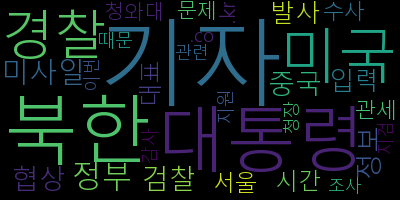

In [10]:
wc = WordCloud(font, max_words=30)
wc.generate_from_frequencies(fd)
wc.to_image()